In [98]:
import matplotlib.pyplot as plt
from sklearn import preprocessing as PP
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [50]:
%matplotlib inline

In [51]:
cereal_data = pd.read_csv('cereals.csv', na_values=-1).dropna()

In [52]:
cereal_data.tail(10)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
67,Special_K,K,C,110,6,0,230,1,16,3,55,25,1,1.0,1.00
68,Strawberry_Fruit_Wheats,N,C,90,2,0,15,3,15,5,90,25,2,1.0,1.00
69,Total_Corn_Flakes,G,C,110,2,1,200,0,21,3,35,100,3,1.0,1.00
70,Total_Raisin_Bran,G,C,140,3,1,190,4,15,14,230,100,3,1.5,1.00
71,Total_Whole_Grain,G,C,100,3,1,200,3,16,3,110,100,3,1.0,1.00
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1.0,0.75
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1.0,1.00
74,Wheat_Chex,R,C,100,3,1,230,3,17,3,115,25,1,1.0,0.67
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1.0,1.00
76,Wheaties_Honey_Gold,G,C,110,2,1,200,1,16,8,60,25,1,1.0,0.75


In [53]:
temp_data = cereal_data
temp_data['weight_norm'] = temp_data.weight.apply(lambda x: (1 / x))
temp_data
s_list = ['calories', 'protien', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'cups']

def normalize(temp_data):
    normalized_data = temp_data[['name', 'mfr', 'type', 'shelf' ]]
    normalized_data = normalized_data
    for series in temp_data:
        if series in s_list:
            normalized_data[series] = temp_data[series].multiply(temp_data.weight_norm)
    return normalized_data

adjusted_data = normalize(temp_data)
adjusted_data.head()


/Users/lancerogers/Iron_Yard/.direnv/python-3.4.2/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
0,100%_Bran,N,C,3,70,1,130,10.0,5.0,6,280,25,0.33
1,100%_Natural_Bran,Q,C,3,120,5,15,2.0,8.0,8,135,0,1.00
2,All-Bran,K,C,3,70,1,260,9.0,7.0,5,320,25,0.33
3,All-Bran_with_Extra_Fiber,K,C,3,50,0,140,14.0,8.0,0,330,25,0.50
5,Apple_Cinnamon_Cheerios,G,C,1,110,2,180,1.5,10.5,10,70,25,0.75


In [54]:
adjusted_data.index = adjusted_data.name
adjusted_data.head()

,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,,,,,,,,,,,,,
100%_Bran,100%_Bran,N,C,3,70,1,130,10.0,5.0,6,280,25,0.33
100%_Natural_Bran,100%_Natural_Bran,Q,C,3,120,5,15,2.0,8.0,8,135,0,1.00
All-Bran,All-Bran,K,C,3,70,1,260,9.0,7.0,5,320,25,0.33
All-Bran_with_Extra_Fiber,All-Bran_with_Extra_Fiber,K,C,3,50,0,140,14.0,8.0,0,330,25,0.50
Apple_Cinnamon_Cheerios,Apple_Cinnamon_Cheerios,G,C,1,110,2,180,1.5,10.5,10,70,25,0.75


In [55]:
def get_dict(groupby_obj):
    keys = []
    val = 1
    x = len(groupby_obj) + 1
    while val < x:
        for key in groupby_obj.groups:
            keys.append((key, val))
            val += 1
    return {el:v for el,v in keys}

In [56]:
mfr = adjusted_data.groupby('mfr')
mfr_d = get_dict(mfr)

name = adjusted_data.groupby('name')
name_d = get_dict(name)

type_o = adjusted_data.groupby('type')
type_d = get_dict(type_o)

In [57]:
adjusted_data = adjusted_data.replace({'name': name_d, 'mfr': mfr_d, 'type': type_d})

In [58]:
adjusted_data.head()




,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,,,,,,,,,,,,,
100%_Bran,51,3,1,3,70,1,130,10.0,5.0,6,280,25,0.33
100%_Natural_Bran,26,4,1,3,120,5,15,2.0,8.0,8,135,0,1.00
All-Bran,30,5,1,3,70,1,260,9.0,7.0,5,320,25,0.33
All-Bran_with_Extra_Fiber,8,5,1,3,50,0,140,14.0,8.0,0,330,25,0.50
Apple_Cinnamon_Cheerios,29,7,1,1,110,2,180,1.5,10.5,10,70,25,0.75


In [59]:
adjusted_data.corr()

,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,1.000000,-0.057720,0.145205,-0.028325,-0.133477,-0.247539,-0.159680,-0.080037,-0.015543,0.049686,-0.093304,-0.023233,0.138474
mfr,-0.057720,1.000000,-0.294354,0.105288,0.005468,0.104236,0.287757,-0.164764,-0.250221,0.267849,-0.151264,0.220316,-0.103488
type,0.145205,-0.294354,1.000000,-0.030621,-0.033627,0.005705,-0.224276,-0.104284,0.040544,-0.107852,0.002480,-0.015137,0.063584
shelf,-0.028325,0.105288,-0.030621,1.000000,-0.081281,0.242811,-0.189475,0.282513,-0.227429,-0.011630,0.369512,0.248498,-0.254103
calories,-0.133477,0.005468,-0.033627,-0.081281,1.000000,0.491052,0.122947,-0.665157,0.213262,0.379533,-0.548822,0.049351,0.259881
fat,-0.247539,0.104236,0.005705,0.242811,0.491052,1.000000,-0.015575,-0.016069,-0.381111,0.271429,0.160523,-0.049387,-0.194895
sodium,-0.159680,0.287757,-0.224276,-0.189475,0.122947,-0.015575,1.000000,-0.138606,0.148051,-0.020790,-0.161686,0.335696,-0.051760
fiber,-0.080037,-0.164764,-0.104284,0.282513,-0.665157,-0.016069,-0.138606,1.000000,-0.426466,-0.275259,0.919284,-0.098043,-0.424328
carbo,-0.015543,-0.250221,0.040544,-0.227429,0.213262,-0.381111,0.148051,-0.426466,1.000000,-0.635888,-0.481377,0.090933,0.565170
sugars,0.049686,0.267849,-0.107852,-0.011630,0.379533,0.271429,-0.020790,-0.275259,-0.635888,1.000000,-0.198641,-0.005375,-0.182667


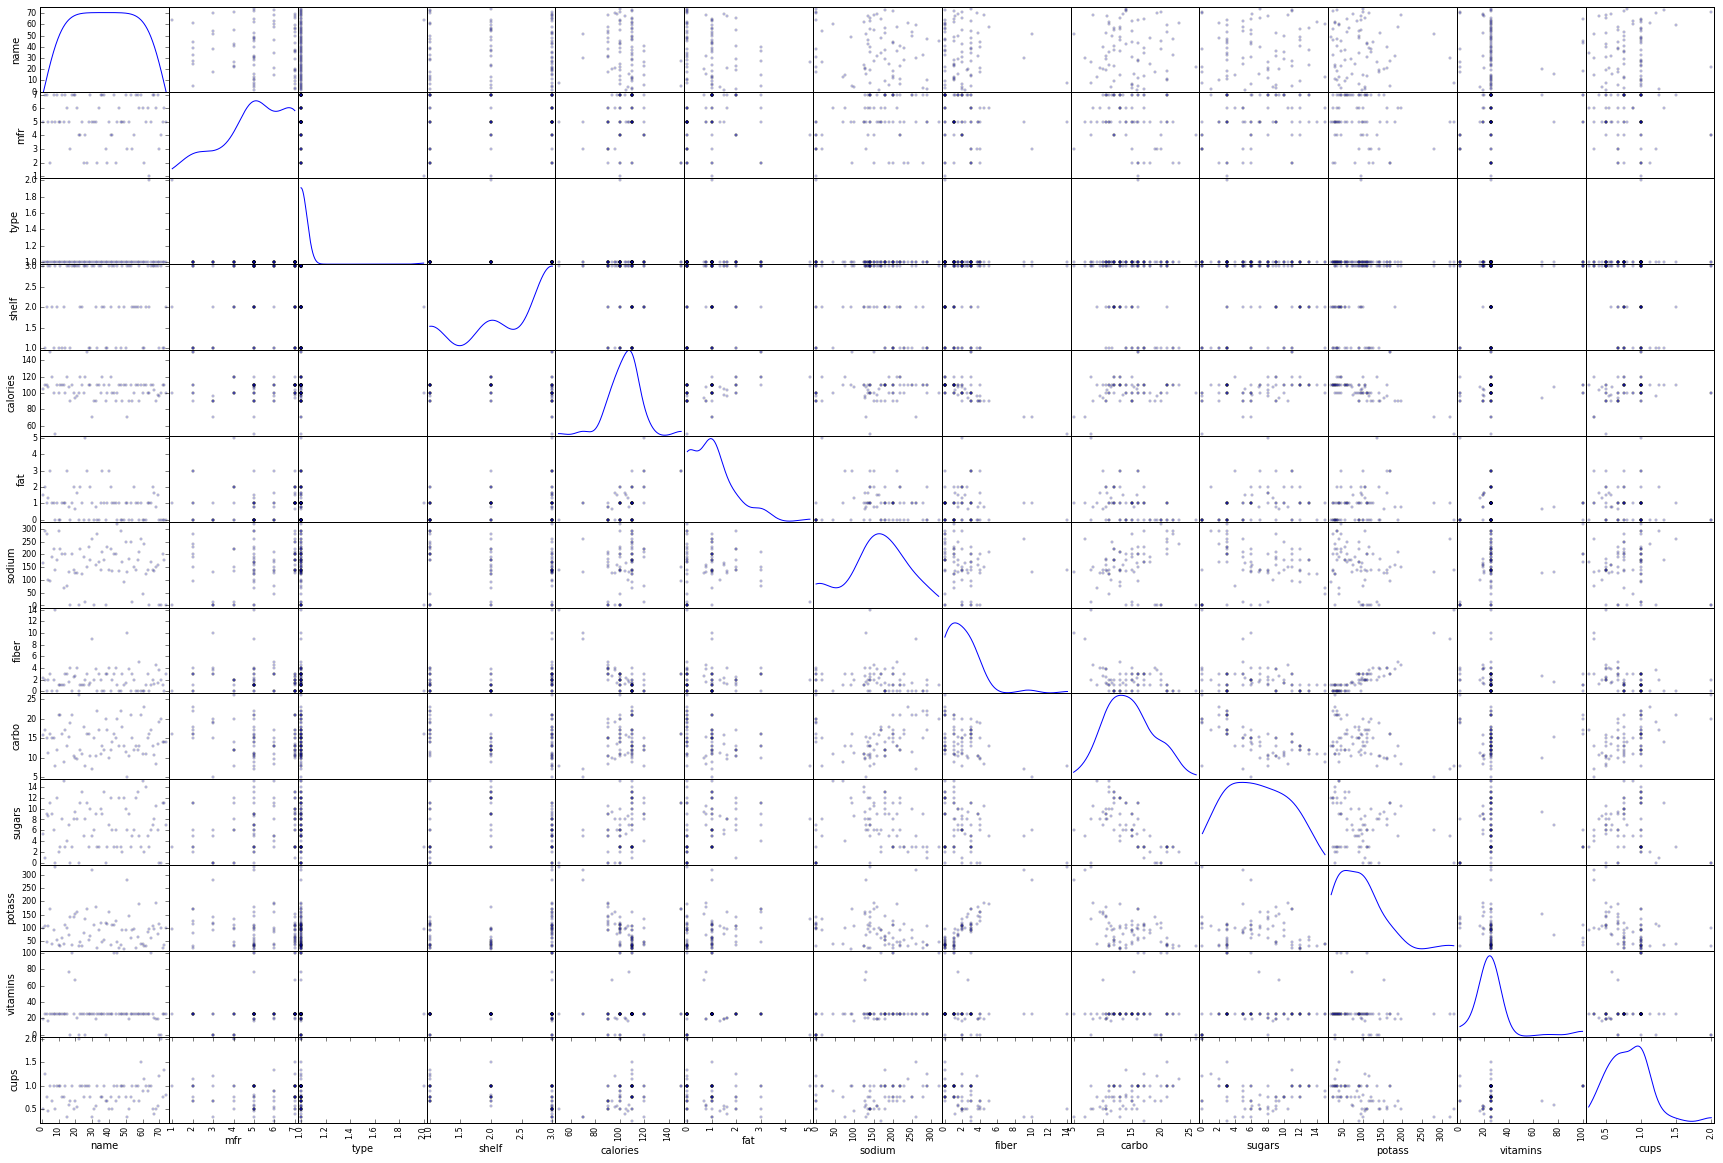

In [105]:
scatter_matrix(adjusted_data, alpha=0.2, figsize=(30, 20), diagonal='kde');

In [140]:
clean_data = PP.scale(adjusted_data)
#clean_data = adjusted_data
clean_data

array([[  6.32022195e-01,  -1.30253505e+00,  -1.17041147e-01,
          9.48401413e-01,  -2.42940193e+00,   4.87412318e-02,
         -3.17217599e-01,   3.40972178e+00,  -2.27763789e+00,
         -1.79679719e-01,   2.92949315e+00,  -1.29327023e-01,
         -1.55613882e+00],
       [ -5.38389277e-01,  -6.96323766e-01,  -1.17041147e-01,
          9.48401413e-01,   1.14074764e+00,   4.14802845e+00,
         -1.73171584e+00,  -3.08551152e-02,  -1.56198921e+00,
          3.14857433e-01,   6.50010666e-01,  -1.36106767e+00,
          5.43262502e-01],
       [ -3.51123442e-01,  -9.01124874e-02,  -1.17041147e-01,
          9.48401413e-01,  -2.42940193e+00,   4.87412318e-02,
          1.28178042e+00,   2.97964967e+00,  -1.80053877e+00,
         -4.26948295e-01,   3.55831590e+00,  -1.29327023e-01,
         -1.55613882e+00],
       [ -1.38108554e+00,  -9.01124874e-02,  -1.17041147e-01,
          9.48401413e-01,  -3.85746176e+00,  -9.76080572e-01,
         -1.94217751e-01,   5.13001022e+00,  -1.561

In [141]:
pca = PCA(n_components=2)
pca.fit(clean_data)
reduced_data = pca.transform(clean_data)


In [142]:
reduced_data.shape


(74, 2)

In [143]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_data)

In [144]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0], dtype=int32)

#Kmeans clustering of name,	mfr,	type,	shelf,	calories,	fat,	sodium,	fiber,	carbo,	sugars, potass,	vitamins, cups. 


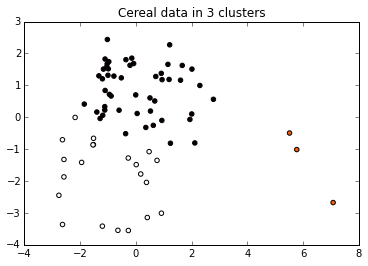

In [145]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal data in 3 clusters")
plt.show()

In [146]:
kmeans = KMeans(4)
y_pred = kmeans.fit_predict(reduced_data)

In [147]:
y_pred

array([3, 1, 3, 3, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2,
       2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 2, 0, 0, 2], dtype=int32)

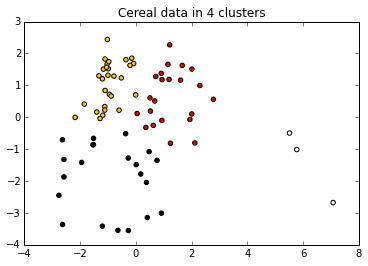

In [148]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal data in 4 clusters")
plt.show()

In [149]:
kmeans = KMeans(5)
y_pred = kmeans.fit_predict(reduced_data)
y_pred

array([2, 1, 2, 2, 3, 3, 1, 0, 1, 3, 3, 3, 1, 3, 4, 4, 3, 3, 1, 4, 1, 0, 3,
       3, 0, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 4, 3, 3, 4, 1, 3, 0, 3, 3, 1, 3,
       3, 1, 0, 1, 1, 4, 4, 0, 1, 1, 1, 1, 4, 4, 0, 0, 0, 3, 4, 0, 3, 1, 3,
       3, 3, 0, 3, 3], dtype=int32)

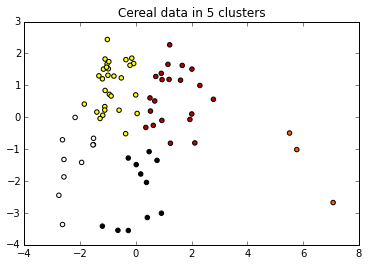

In [150]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal data in 5 clusters")
plt.show()

In [151]:
kmeans = KMeans(6)
y_pred = kmeans.fit_predict(reduced_data)
y_pred

array([3, 5, 3, 3, 0, 0, 5, 1, 1, 0, 0, 0, 5, 0, 2, 2, 0, 0, 5, 2, 5, 1, 0,
       0, 1, 5, 5, 0, 0, 0, 1, 1, 5, 0, 0, 2, 0, 0, 2, 1, 0, 4, 0, 0, 5, 0,
       0, 5, 1, 5, 5, 2, 4, 4, 1, 5, 5, 1, 2, 2, 4, 4, 4, 0, 2, 1, 0, 5, 1,
       0, 0, 1, 1, 0], dtype=int32)

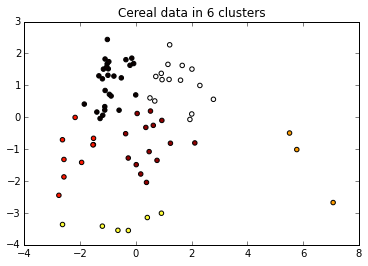

In [152]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal data in 6 clusters")
plt.show()

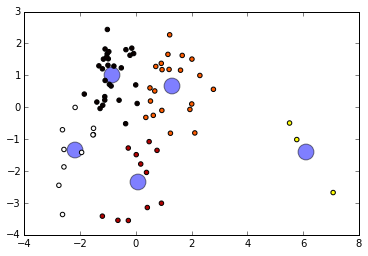

In [158]:
kmeans2 = KMeans(5)
labels = kmeans2.fit_predict(reduced_data)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], alpha=.5, s=250)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap="hot")

##Judging by the plots, I think there are 5 main groups of cereals in the data.

In [209]:
readjust_df = adjusted_data
readjust_df.head()

,name,mfr,type,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,,,,,,,,,,,,,
100%_Bran,51,3,1,3,70,1,130,10.0,5.0,6,280,25,0.33
100%_Natural_Bran,26,4,1,3,120,5,15,2.0,8.0,8,135,0,1.00
All-Bran,30,5,1,3,70,1,260,9.0,7.0,5,320,25,0.33
All-Bran_with_Extra_Fiber,8,5,1,3,50,0,140,14.0,8.0,0,330,25,0.50
Apple_Cinnamon_Cheerios,29,7,1,1,110,2,180,1.5,10.5,10,70,25,0.75


In [210]:
readjust_df.groupby('type').size()

type
1    73
2     1
dtype: int64

In [211]:
readjust_df = readjust_df.drop('type', axis=1)
readjust_df = readjust_df.drop('name', axis=1)


In [212]:
readjust_df.head()

,mfr,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,,,,,,,,,,,
100%_Bran,3,3,70,1,130,10.0,5.0,6,280,25,0.33
100%_Natural_Bran,4,3,120,5,15,2.0,8.0,8,135,0,1.00
All-Bran,5,3,70,1,260,9.0,7.0,5,320,25,0.33
All-Bran_with_Extra_Fiber,5,3,50,0,140,14.0,8.0,0,330,25,0.50
Apple_Cinnamon_Cheerios,7,1,110,2,180,1.5,10.5,10,70,25,0.75


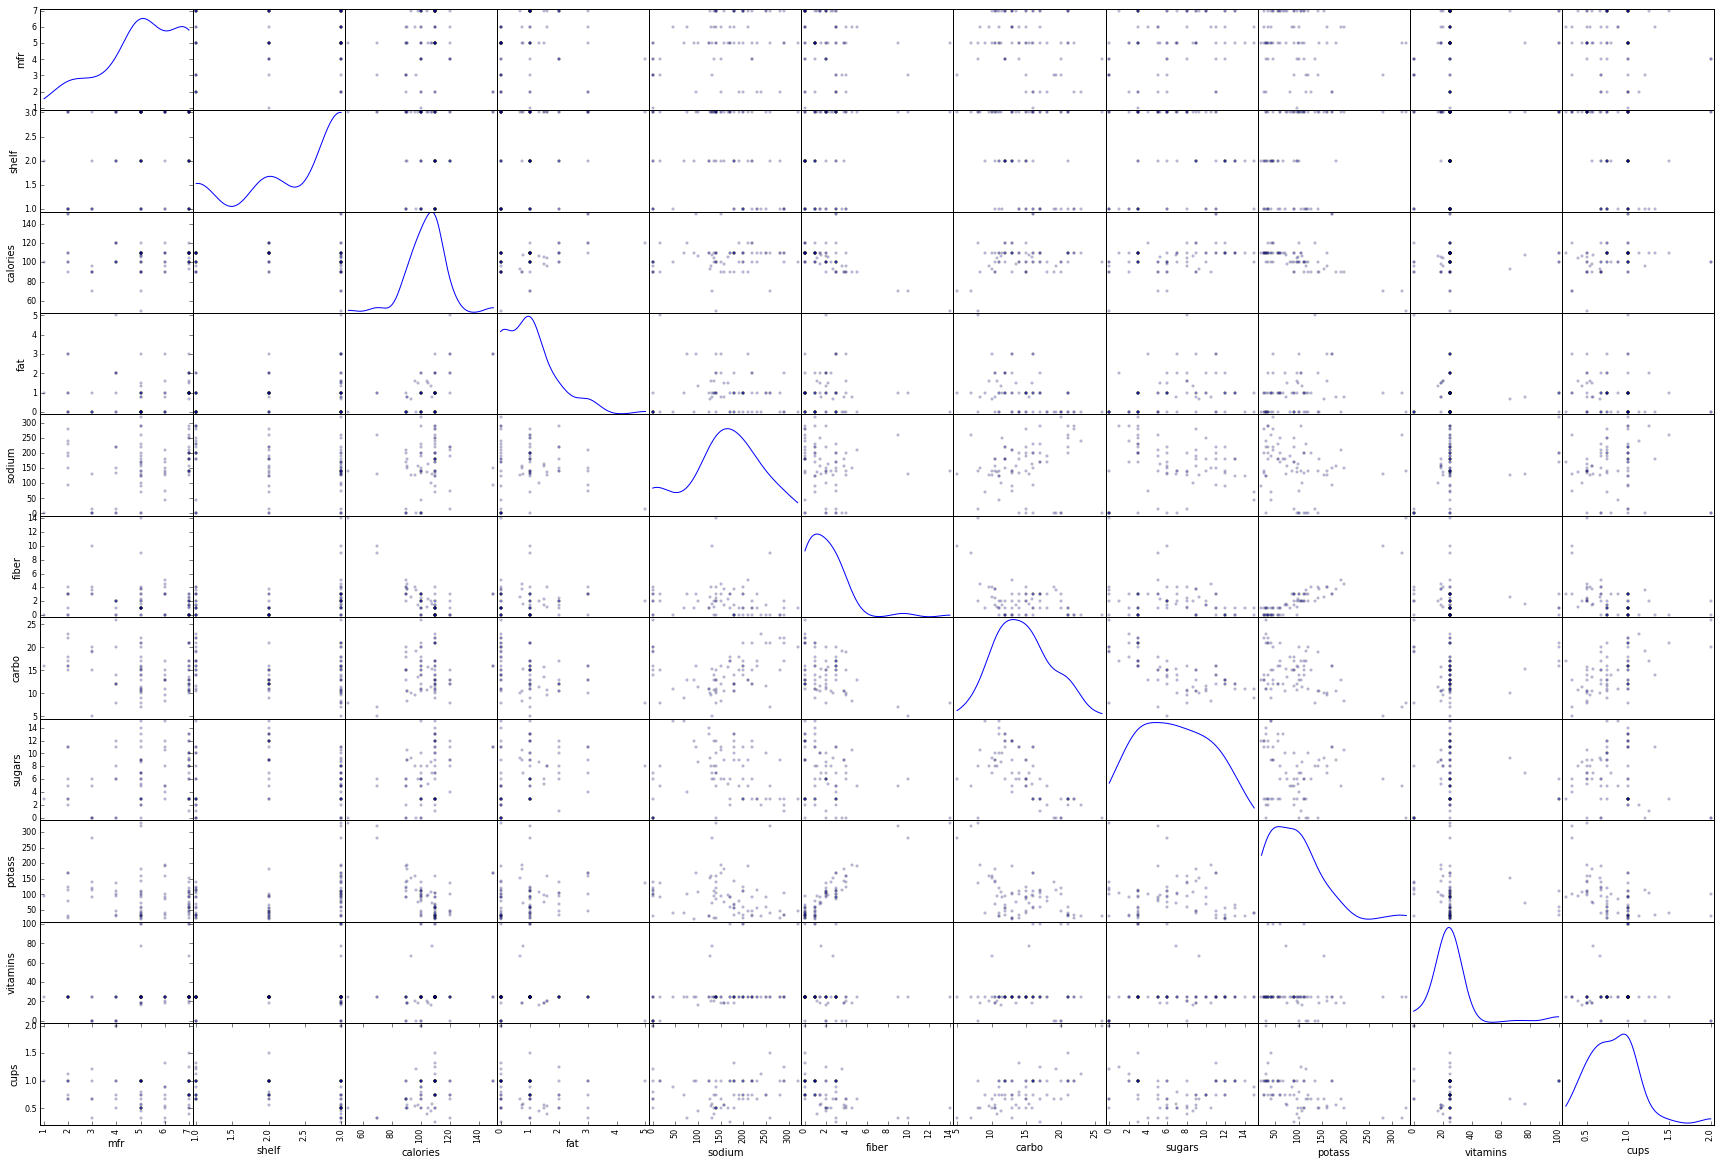

In [213]:
scatter_matrix(readjust_df, alpha=0.2, figsize=(30,20), diagonal='kde');


In [214]:
readjust_df.head()


,mfr,shelf,calories,fat,sodium,fiber,carbo,sugars,potass,vitamins,cups
name,,,,,,,,,,,
100%_Bran,3,3,70,1,130,10.0,5.0,6,280,25,0.33
100%_Natural_Bran,4,3,120,5,15,2.0,8.0,8,135,0,1.00
All-Bran,5,3,70,1,260,9.0,7.0,5,320,25,0.33
All-Bran_with_Extra_Fiber,5,3,50,0,140,14.0,8.0,0,330,25,0.50
Apple_Cinnamon_Cheerios,7,1,110,2,180,1.5,10.5,10,70,25,0.75
